In [1]:
import pandas as pd #To read the CSV file
import numpy as np # Numerical calculations

In [5]:
df= pd.read_csv(r'E:\project_2\working\Heart Disease\dataset.csv')
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1190.0,53.720168,9.358203,28.0,47.0,54.0,60.00,77.0
sex,1190.0,0.763866,0.424884,0.0,1.0,1.0,1.00,1.0
chest pain type,1190.0,3.232773,0.935480,1.0,3.0,4.0,4.00,4.0
resting bp s,1190.0,132.153782,18.368823,0.0,120.0,130.0,140.00,200.0
cholesterol,1190.0,210.363866,101.420489,0.0,188.0,229.0,269.75,603.0
fasting blood sugar,1190.0,0.213445,0.409912,0.0,0.0,0.0,0.00,1.0
resting ecg,1190.0,0.698319,0.870359,0.0,0.0,0.0,2.00,2.0
max heart rate,1190.0,139.732773,25.517636,60.0,121.0,140.5,160.00,202.0
exercise angina,1190.0,0.387395,0.487360,0.0,0.0,0.0,1.00,1.0
oldpeak,1190.0,0.922773,1.086337,-2.6,0.0,0.6,1.60,6.2


In [8]:
# Number of unique values for each attributes
df.nunique().sum

<bound method Series.sum of age                     50
sex                      2
chest pain type          4
resting bp s            67
cholesterol            222
fasting blood sugar      2
resting ecg              3
max heart rate         119
exercise angina          2
oldpeak                 53
ST slope                 4
target                   2
dtype: int64>

In [9]:
# Checking for null values
df.isnull().sum()

age                    0
sex                    0
chest pain type        0
resting bp s           0
cholesterol            0
fasting blood sugar    0
resting ecg            0
max heart rate         0
exercise angina        0
oldpeak                0
ST slope               0
target                 0
dtype: int64

visualizations

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

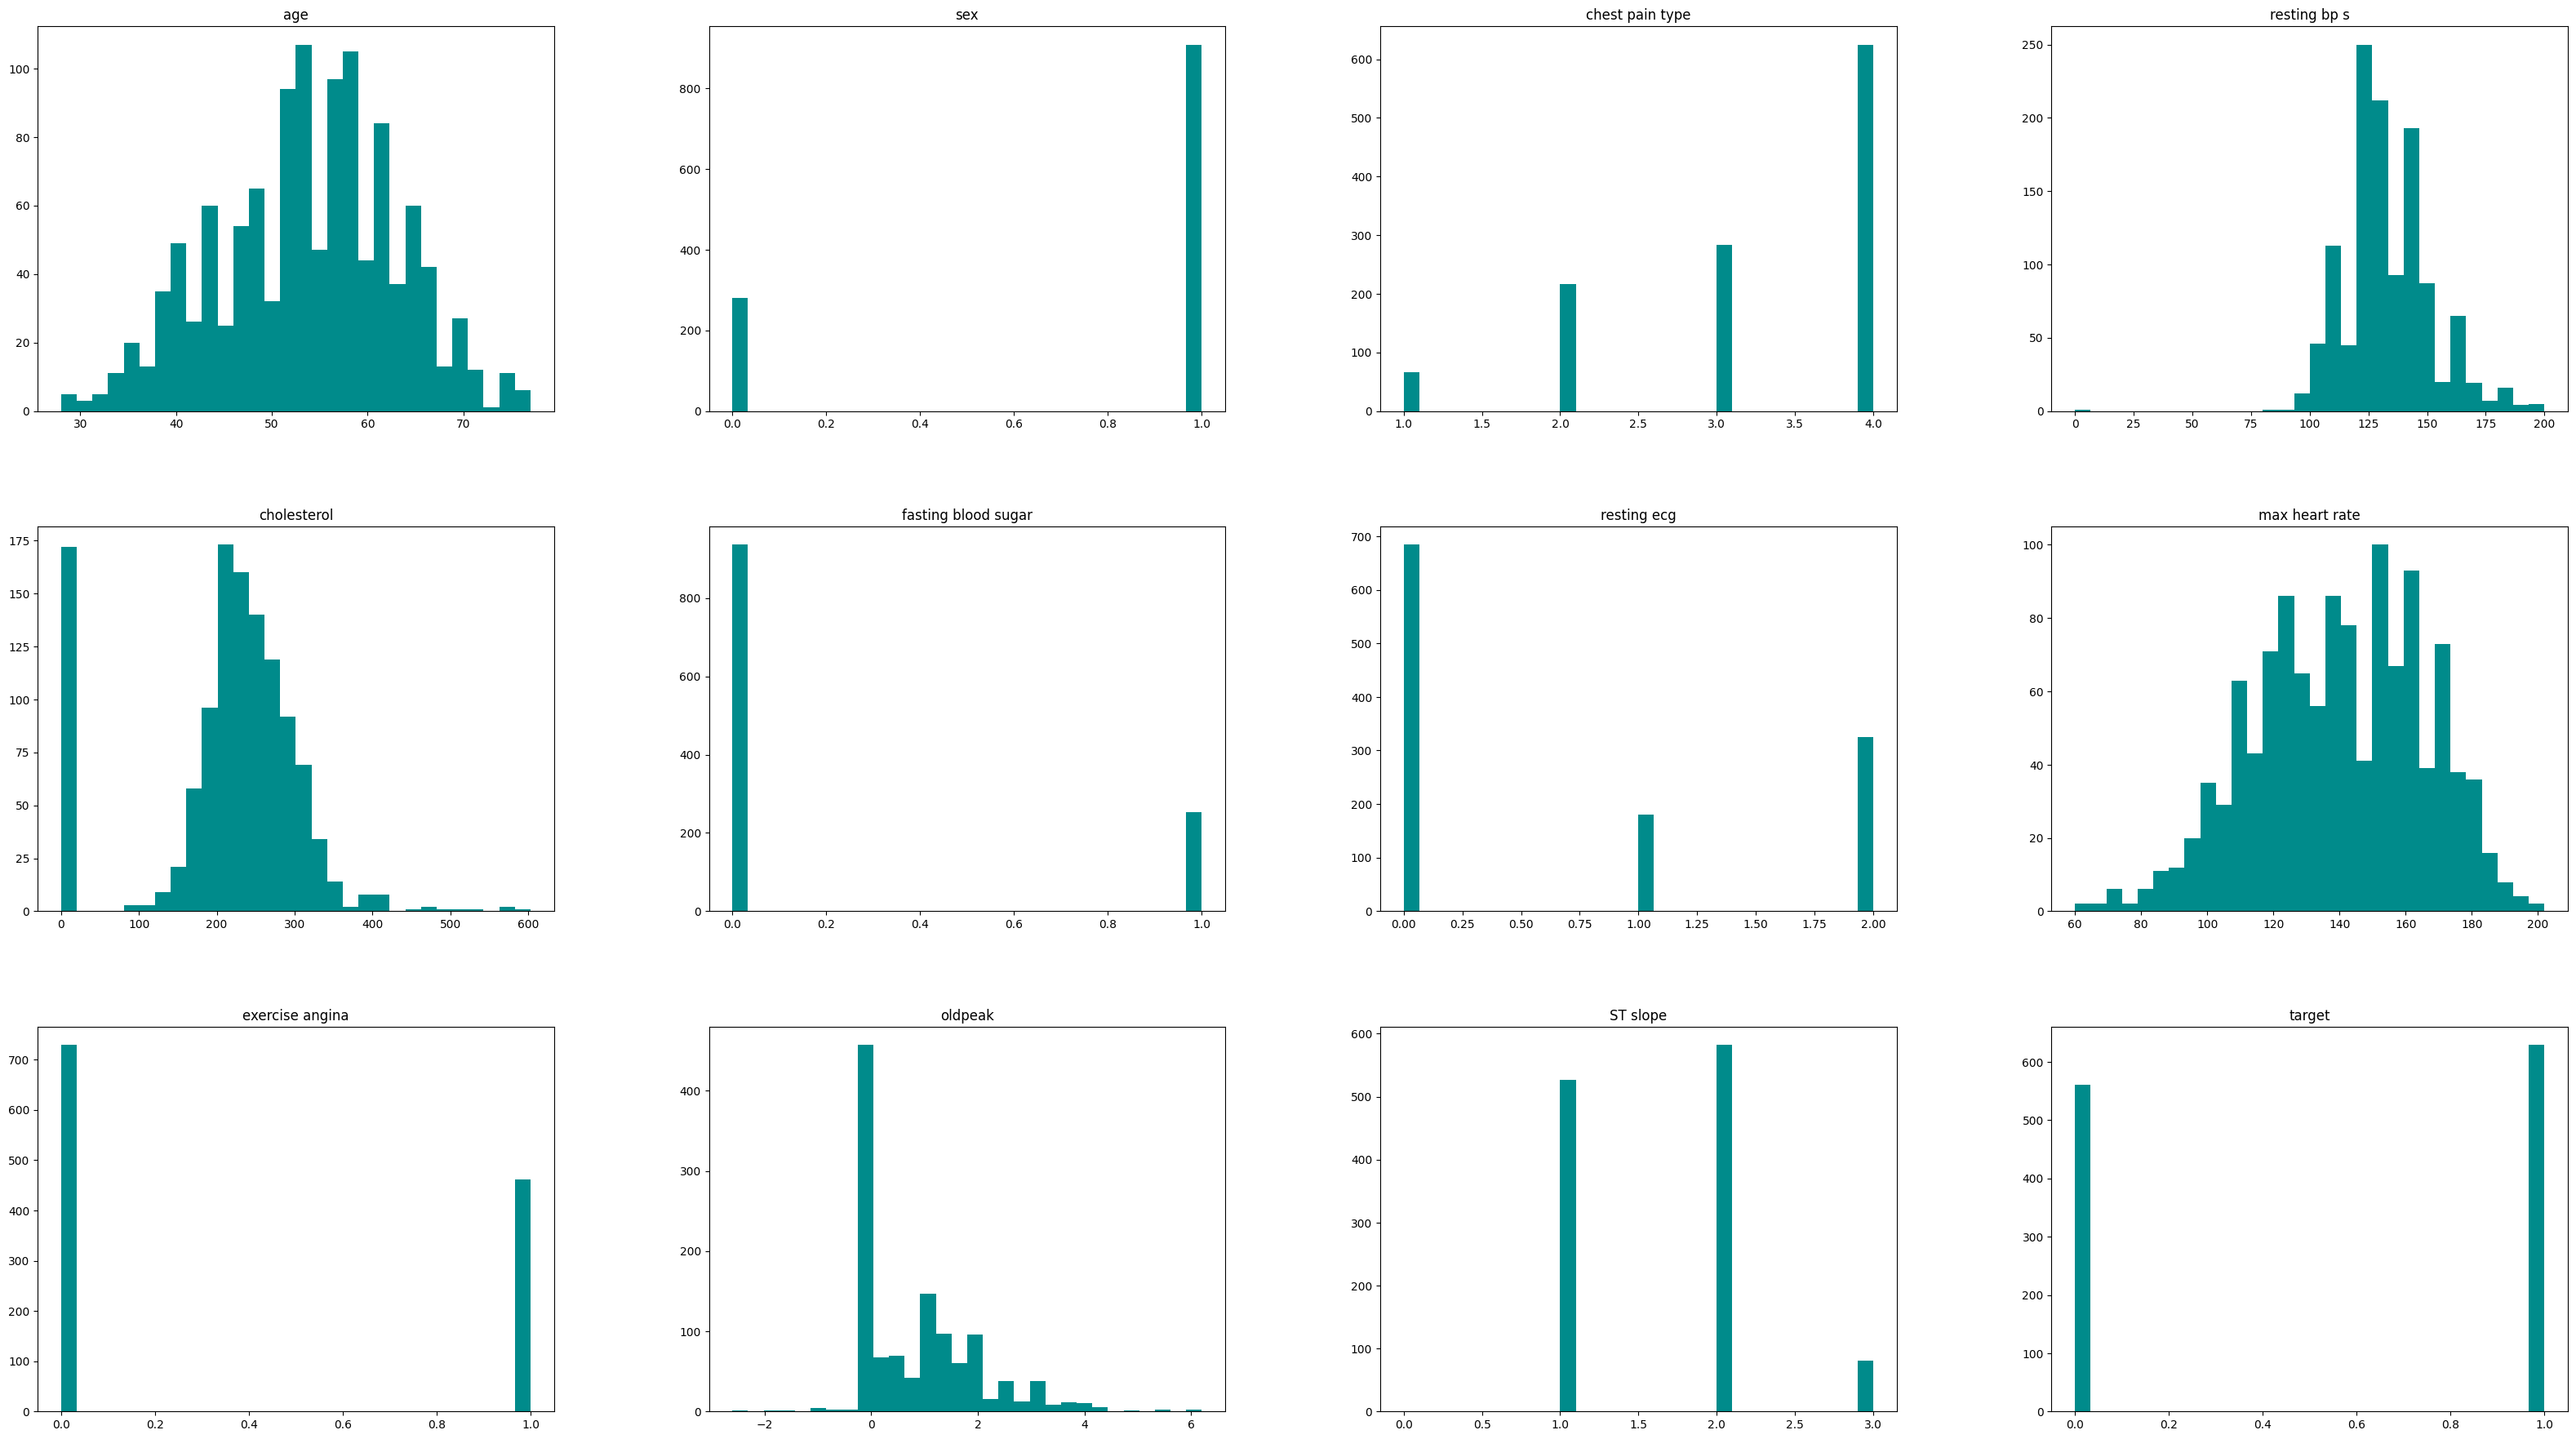

In [11]:
# Histogram to check the distribution of each attribute

df.hist(bins = 30 , layout = (4,4), figsize = (40,30)  ,column = df.columns[0:], color= "DarkCyan", grid = False)
plt.show()

<Axes: >

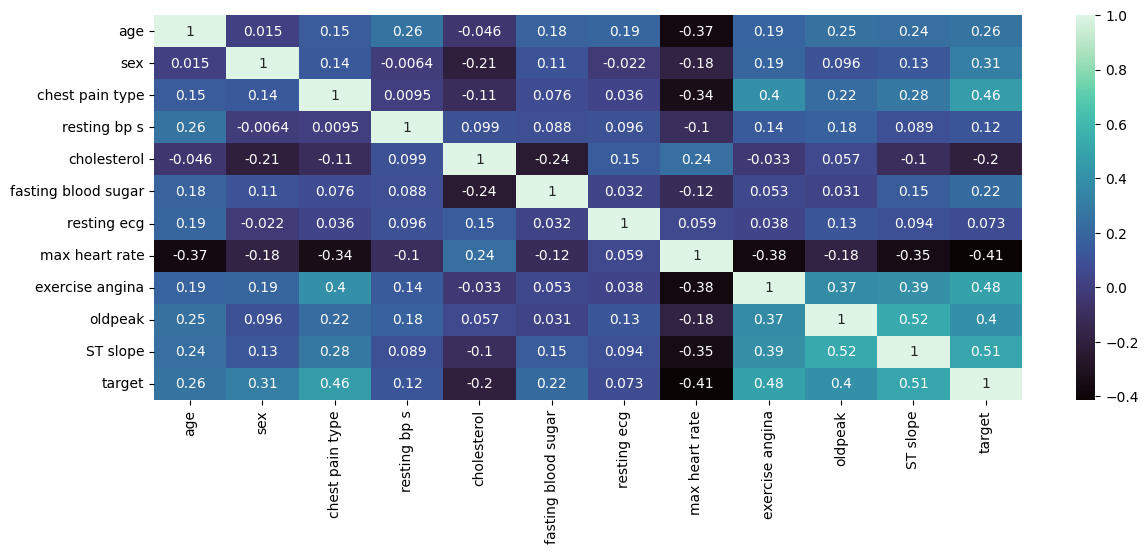

In [12]:
df_corr= df.corr()
plt.figure(figsize = (14,5))
sns.heatmap(df_corr,annot=True,cmap = 'mako')

C:\Users\HP\AppData\Local\Temp\ipykernel_12720\1436060163.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df[column], palette="Set2")


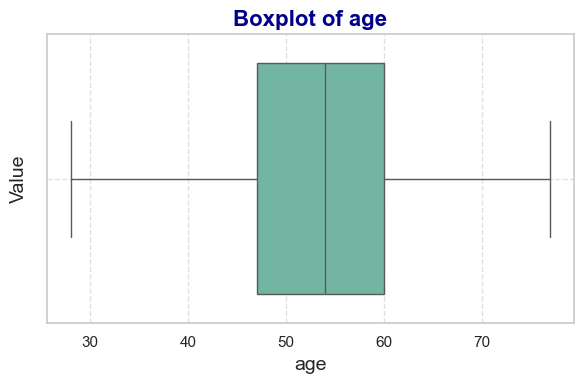

KeyError: 'trestbps'

<Figure size 600x400 with 0 Axes>

In [13]:
numerical_columns= ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
# List of (by default) non-categorical attributes

#Boxplot

sns.set(style="whitegrid")  

# Iterate through the numerical columns and create a boxplot for each one
for column in numerical_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=df[column], palette="Set2")
    plt.title(f'Boxplot of {column}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(column, fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()  
    plt.show()

In [ ]:
# List of columns to generate boxplots
columns = ['A', 'B', 'C', 'D']

# Set figure size
plt.figure(figsize=(10, len(columns) * 4))

# Loop through each column and create a separate boxplot
for i, col in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)  # Creating subplots
    sns.boxplot(x=df[col], palette="Set2")
    plt.title(f'Boxplot of {col}')  # Title for each plot


Preparing the dataset for training

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
X= df.drop(['target'], axis=1)
y= df['target']

In [16]:
# Scaling
scaler= StandardScaler()
X= scaler.fit_transform(X)

In [17]:
# Train test split
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size= 0.2, random_state= 42)

Model training

In [18]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

# Define models
models = {
    "Logistic Regression": LogisticRegression(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "AdaBoost": AdaBoostClassifier(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# Evaluate each model using cross-validation
results = {}
for name, model in models.items():
    cv_results = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    results[name] = cv_results.mean()

# Print model performance comparison
for name, result in results.items():
    print(f"{name}: {result:.4f} accuracy")

Logistic Regression: 0.8151 accuracy
SVM: 0.8550 accuracy
Gradient Boosting: 0.8781 accuracy
AdaBoost: 0.8455 accuracy
KNN: 0.8392 accuracy
Naive Bayes: 0.8288 accuracy


In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [20]:
# Create the ANN model
model = Sequential()

# Input layer (with the same number of nodes as features in the dataset)
model.add(Dense(units=64, activation='relu', input_dim=X_train.shape[1]))

# Hidden layer
model.add(Dense(units=32, activation='relu'))

# Output layer (since it's binary classification, we use 1 unit with sigmoid activation)
model.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))

Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5866 - loss: 0.6481 - val_accuracy: 0.8361 - val_loss: 0.4148
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8364 - loss: 0.3870 - val_accuracy: 0.8571 - val_loss: 0.3648
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8342 - loss: 0.3696 - val_accuracy: 0.8613 - val_loss: 0.3529
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8267 - loss: 0.3780 - val_accuracy: 0.8782 - val_loss: 0.3460
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8322 - loss: 0.3629 - val_accuracy: 0.8782 - val_loss: 0.3403
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8148 - loss: 0.3688 - val_accuracy: 0.8782 - val_loss: 0.3314
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8405 - loss: 0.3547 - val_accuracy: 0.8782 - val_loss: 0.3279
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8510 - loss: 0.3274 - val_accuracy: 0.8866 - val_loss:

In [22]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9145 - loss: 0.2116 
Test Accuracy: 0.9034


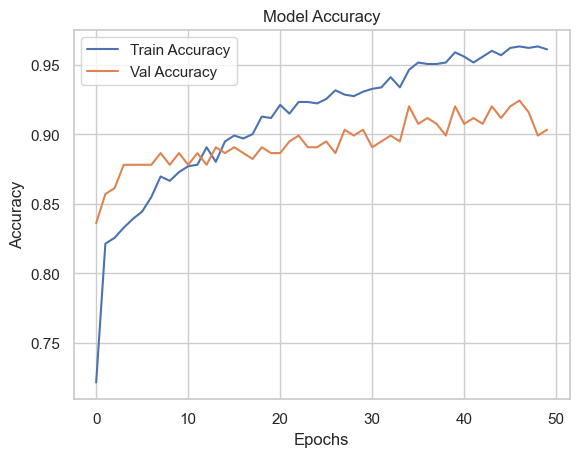

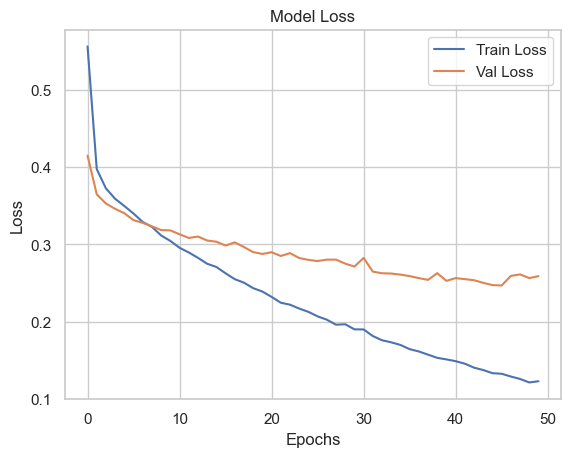

In [23]:
# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Model Evaluation:

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


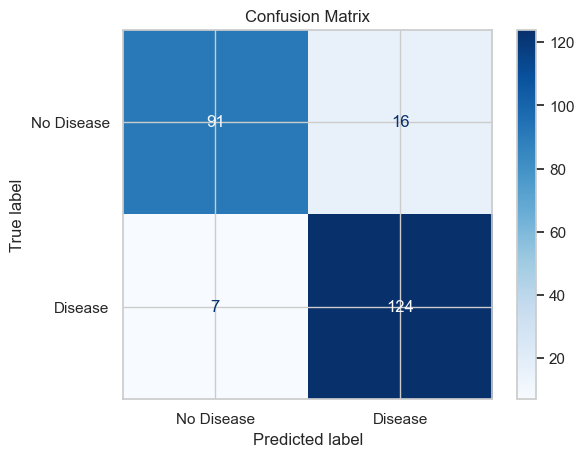

In [25]:
# Confusion Matrix

# Predict on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Threshold at 0.5 for binary classification

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Disease", "Disease"])
cm_display.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [26]:
# Classification report

report = classification_report(y_test, y_pred, target_names=["No Disease", "Disease"])
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

  No Disease       0.93      0.85      0.89       107
     Disease       0.89      0.95      0.92       131

    accuracy                           0.90       238
   macro avg       0.91      0.90      0.90       238
weighted avg       0.90      0.90      0.90       238



8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


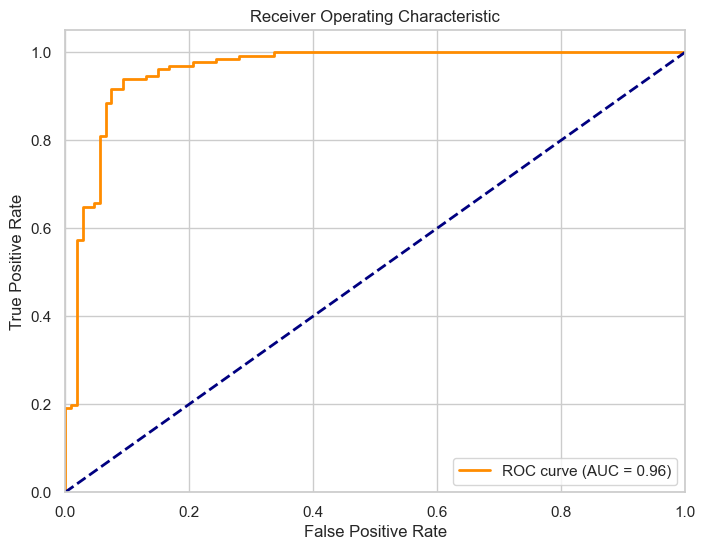

In [27]:
# ROC curve and AUC
from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_prob = model.predict(X_test)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal (random guess)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()